In [5]:
#Метрики центрального положения 
import pandas as pd
winequality = pd.read_csv("winequality-red.csv") 
winequality["alcohol"].mean()

10.422983114446502

In [6]:
winequality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
winequality[["alcohol", "quality","pH"]].median()

alcohol    10.20
quality     6.00
pH          3.31
dtype: float64

In [3]:
#Описательная стата 
winequality[["alcohol", "pH","quality"]].describe()

,alcohol,pH,quality
count,1599.000000,1599.000000,1599.000000
mean,10.422983,3.311113,5.636023
std,1.065668,0.154386,0.807569
min,8.400000,2.740000,3.000000
25%,9.500000,3.210000,5.000000
50%,10.200000,3.310000,6.000000
75%,11.100000,3.400000,6.000000
max,14.900000,4.010000,8.000000


In [4]:
#комбинации агрегированной статистики 
winequality.agg(
    {
        "alcohol": ["min","max","median"],
        "pH": ["min","max","median","mean"]
    }
)

,alcohol,pH
min,8.4,2.740000
max,14.9,4.010000
median,10.2,3.310000
mean,NaN,3.311113


In [5]:
#Процентиль 
winequality[["alcohol", "pH","quality"]].describe(percentiles=[0.10, 0.30, 0.80, 0.55])

,alcohol,pH,quality
count,1599.000000,1599.000000,1599.000000
mean,10.422983,3.311113,5.636023
std,1.065668,0.154386,0.807569
min,8.400000,2.740000,3.000000
10%,9.300000,3.120000,5.000000
30%,9.600000,3.230000,5.000000
50%,10.200000,3.310000,6.000000
55%,10.400000,3.330000,6.000000
80%,11.300000,3.424000,6.000000
max,14.900000,4.010000,8.000000


<AxesSubplot:xlabel='pH', ylabel='Count'>

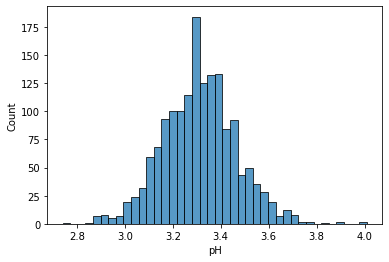

In [6]:
import seaborn as sns 
sns.histplot(data=winequality["pH"],bins = )

In [7]:
winequality[["quality", "pH"]].groupby("quality").max()

,pH
quality,
3,3.63
4,3.90
5,3.74
6,4.01
7,3.78
8,3.72


In [8]:
winequality.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [16]:
winequality.groupby(["pH","alcohol"])["citric acid"].mean()

pH    alcohol
2.74  9.4        1.00
2.86  8.4        0.74
2.87  10.2       0.18
2.88  9.7        0.11
      9.8        0.72
                 ... 
3.78  12.5       0.00
3.85  12.9       0.17
3.90  12.8       0.02
      13.1       0.15
4.01  12.5       0.00
Name: citric acid, Length: 922, dtype: float64

In [10]:
#количество записей на fixed acidity
winequality["fixed acidity"].value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64

In [11]:
s=pd.Series([1,3,5,11,10,3,6,6,6,13,8,8,8,8])

<AxesSubplot:ylabel='Count'>

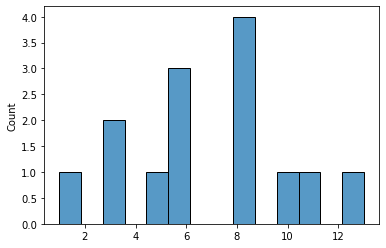

In [17]:
import seaborn as sns 
sns.histplot(data=s,bins=14)

In [18]:
s.describe()

count    14.000000
mean      6.857143
std       3.278300
min       1.000000
25%       5.250000
50%       7.000000
75%       8.000000
max      13.000000
dtype: float64

In [14]:
s.median()

7.0

<AxesSubplot:>

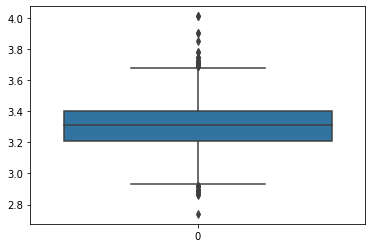

In [20]:
sns.boxplot(data=winequality["pH"])